In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.signal import find_peaks

In [23]:
ecg_data = pd.read_csv("ptbdb_normal.csv", on_bad_lines='skip')

ecg_data["9.003241658210754395e-01"]
df_part = ecg_data.iloc[1500:4000].copy()
df_part

,1.000000000000000000e+00,9.003241658210754395e-01,3.585899472236633301e-01,5.145867168903350830e-02,4.659643396735191345e-02,1.268233358860015869e-01,1.333063244819641113e-01,1.191247999668121338e-01,1.106158867478370667e-01,1.130470037460327148e-01,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
1500,0.936777,0.906612,0.662810,0.336777,0.131818,0.000000,0.062397,0.137190,0.136777,0.132645,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1501,1.000000,0.838710,0.173720,0.095590,0.126073,0.113939,0.094111,0.094407,0.084640,0.089672,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1502,1.000000,0.962679,0.363446,0.020928,0.000000,0.051622,0.117893,0.166027,0.203348,0.213115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1503,1.000000,0.354800,0.038760,0.000000,0.118068,0.200954,0.223017,0.223017,0.227788,0.233154,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1504,0.977872,0.953192,0.703830,0.330638,0.116170,0.000000,0.076170,0.143404,0.142128,0.142128,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1.000000,0.630217,0.187537,0.000000,0.106996,0.182834,0.243974,0.258083,0.255144,0.258671,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3996,0.976974,0.254605,0.105263,0.072368,0.122368,0.150000,0.129605,0.126316,0.113816,0.107895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3997,1.000000,0.788100,0.530055,0.330601,0.191560,0.133273,0.101093,0.079235,0.086825,0.079842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3998,1.000000,0.587143,0.234789,0.036439,0.019938,0.068752,0.085940,0.069096,0.064283,0.071846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


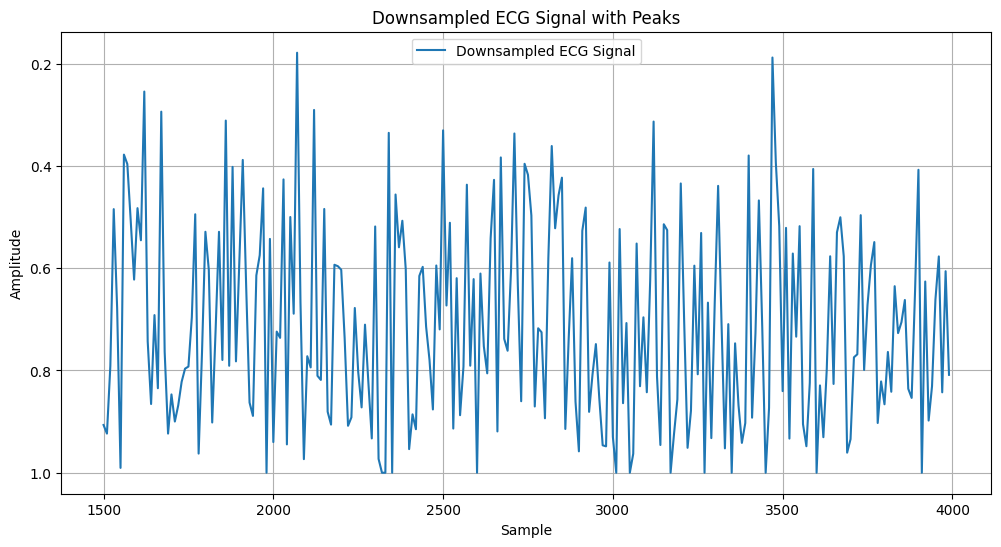

In [33]:
# Downsample the data
downsample_rate = 10
df_downsampled = df_part.iloc[::downsample_rate]

# Detect peaks in the downsampled data
# peaks, _ = find_peaks(df_downsampled['digits_int'], height=0)  # Adjust height as needed

plt.figure(figsize=(12, 6))
plt.plot(df_downsampled.index, df_downsampled["9.003241658210754395e-01"], label="Downsampled ECG Signal")
# plt.plot(df_downsampled.index[peaks], df_downsampled['digits_int'].iloc[peaks], "rx", label="Peaks")
plt.title("Downsampled ECG Signal with Peaks")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.gca().invert_yaxis()
plt.show()